<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проектная-работа-&quot;Принятие-решений-в-бизнесе&quot;" data-toc-modified-id="Проектная-работа-&quot;Принятие-решений-в-бизнесе&quot;-1">Проектная работа "Принятие решений в бизнесе"</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Библиотеки-и-датасеты" data-toc-modified-id="Библиотеки-и-датасеты-1.0.1">Библиотеки и датасеты</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.0.2">Предобработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1.0.3">Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-1.0.4">Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#График-кумулятивной-выручки-по-группам" data-toc-modified-id="График-кумулятивной-выручки-по-группам-1.0.4.1">График кумулятивной выручки по группам</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-группам" data-toc-modified-id="График-кумулятивного-среднего-чека-по-группам-1.0.4.2">График кумулятивного среднего чека по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-1.0.4.3">График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивной-конверсии-(среднего-количества-заказов-на-посетителя)" data-toc-modified-id="График-кумулятивной-конверсии-(среднего-количества-заказов-на-посетителя)-1.0.4.4">График кумулятивной конверсии (среднего количества заказов на посетителя)</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A-1.0.4.5">График относительного изменения кумулятивной конверсии группы B к группе A</a></span></li><li><span><a href="#График-количества-заказов-по-пользователям" data-toc-modified-id="График-количества-заказов-по-пользователям-1.0.4.6">График количества заказов по пользователям</a></span></li><li><span><a href="#График-стоимостей-заказов" data-toc-modified-id="График-стоимостей-заказов-1.0.4.7">График стоимостей заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-между-группами-по-&quot;неочищенным&quot;-данным" data-toc-modified-id="Статистическая-значимость-различий-между-группами-по-&quot;неочищенным&quot;-данным-1.0.4.8">Статистическая значимость различий между группами по "неочищенным" данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-между-группами-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Статистическая-значимость-различий-между-группами-по-&quot;очищенным&quot;-данным-1.0.4.9">Статистическая значимость различий между группами по "очищенным" данным</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-1.0.4.10">Выводы по разделу</a></span></li></ul></li><li><span><a href="#Выводы-по-проекту" data-toc-modified-id="Выводы-по-проекту-1.0.5">Выводы по проекту</a></span></li></ul></li></ul></li></ul></div>

# Проектная работа "Принятие решений в бизнесе"

**Описание проекта**

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нам необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Цель работы:** приоритизация гипотез, проведения А/В-теста и анализ результатов с целью увеличения выручки 

**План работы:** 
1. приоритизировать гипотезы с применением ICE и RICE
2. провести А/В-тест
3. построить графики, в т.ч. по среднему чеку и количеству заказов
4. посчитать статистическую значимость
5. оценить влияние аномалий
6. сформулировать выводы

### Библиотеки и датасеты

In [29]:
# загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import datetime as dt
import warnings
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [30]:
# загрузим датафреймы
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

### Предобработка данных

In [31]:
# приведем названия столбцов к нижнему регистру
datas = [hypothesis, orders, visitors] 

for a in datas:
    a.columns = [x.lower().replace(' ', '_') for x in a.columns.values]
    
pd.set_option('max_colwidth', 120)   

In [32]:
# выведем таблицы и информацию о данных
datas = [hypothesis, orders, visitors] 

for a in datas:
    display(a.head(10))
    print(a.info())
    print(a.duplicated().sum())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
0


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
0


Мы обнаружили, что тип данных в столбцах date в таблицах orders и visitors - object, необходимо привести к типу даты.

In [33]:
# приведем столбцы date к типу datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [34]:
# проверим неявные дубликаты в столбцах с группами
print(orders.groupby('group').count())
print(visitors.groupby('group').count())

       transactionid  visitorid  date  revenue
group                                         
A                557        557   557      557
B                640        640   640      640
       date  visitors
group                
A        31        31
B        31        31


**Выводы:**
* пропусков и дубликатов в данных не выявлено;
* названия столбцов приведены к формату snake_case;
* скорретирован тип данных в столбцах date - приведен к формату даты.

### Приоритизация гипотез

Приоритизируем гипотезы для оптимизации расходов на эксперименты и запуска тестирования наиболее перспективных идей с применением фреймворков ICE и RICE. Мы исходим из шкалы ранжирования, где 1-минимальная оценка показателя (минимальный охват пользователей, трудозатрат для тестирования гипотезы и т.д.), 10-максимальная (максимальное влияние изменений на пользователей, максимальная уверенность в оценке параметров).

In [35]:
# посчитаем ICE для гипотез и выведем обновленную таблицу
hypothesis['ice'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 2)
display(hypothesis.sort_values(by='ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


В случае с ICE наиболее перспективная гипотеза 8 - акции со скидкой в день рождения, на последнем месте - изменения цветового фона главной страницы для роста вовлеченности пользователей. 

In [36]:
# посчитаем ICE для гипотез и выведем обновленную таблицу
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В случае с RICE наиболее перспективная гипотеза 7 - форма подписки на страницу для формирования клиентской базы для e-mail, на последнем месте - изменения цветового фона главной страницы для роста вовлеченности пользователей.

**Вывод:** 
* с включением параметра оценки охвата пользователей (Reach) изменились результаты приоритизации: в случае с ICE наиболее приоритетной могла считаться гипотеза о скидке в день рождения, но параметру Reach по нему присвоен наименьший балл (1), что обусловило то, что в случае с RICE гипотеза о форме для сбора базы e-mail является наиболее приоритетной, так как она имеет наивысшую оценку охвата пользователей (10). 
* И в том, и в другом случае изменение цвета фона страницы - непопулярная гипотеза, так как при невысокой стоимости тестирования этой гипотезы она также имеет низкую оценку охвата и влияния и уверенности в этом влиянии. 
* В случае и с ICE, и с RICE топ-5 гипотез одинаковы, меняется только их порядок: например, с учетом количества пользовательского охвата на 2-м месте по приоритетности будет гипотеза о добавлении рекомендаций товаров на сайте для повышения конверсии и среднего чека заказа (охват-8,уверенность-7,относительно небольшие трудозатраты-3) и на 3-м - новые каналы привлечения трафика, привлекающие на 30% больше пользователей (максимальная оценка влияния-10, высокая уверенность в присвоенных оценках-8).

### Анализ A/B-теста

In [37]:
# поиск пользователей, попавших в обе группы
duplicated_users = orders.groupby('visitorid').agg({'group':['nunique']})

duplicated_users.columns = ['groups']
duplicated_users = duplicated_users.query('groups > 1')
print('Количество пользователей, попавших в обе группы:', len(duplicated_users))

# удалим пользователей, попавших в обе группы
orders = orders.query('visitorid not in @duplicated_users.index')
print(orders.info())

Количество пользователей, попавших в обе группы: 58
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB
None


Мы исключили из анализа пользователей, вошедших в обе группы, это привело к исключению 15% данных из таблицы orders (из 1197 осталось 1016). Как правило, при обработке аномалий аналитики исключают не более 10% данных, за исключением ситуаций, когда это существенно сказывается на качестве анализа. В нашем случае при неисключении "двойных агентов" мы не могли бы быть уверены в мотивах принятия решения, что не позволяет делать однозначные выводы.

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv. Выполним необходимые задачи и проанализируем результаты.

#### График кумулятивной выручки по группам

In [38]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

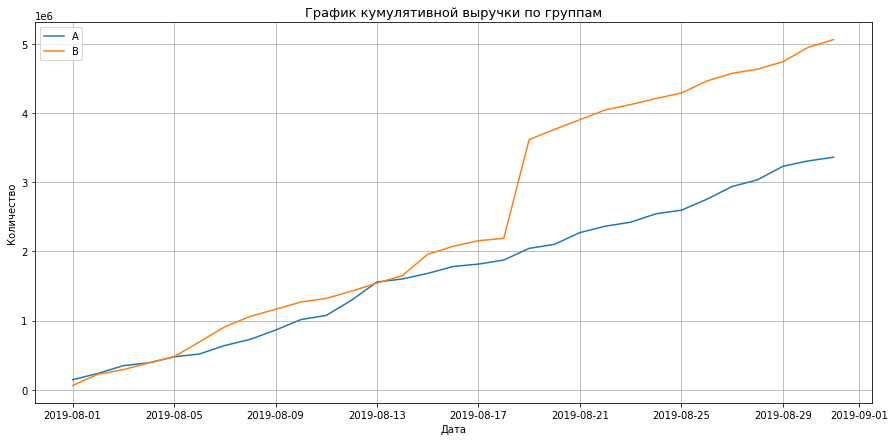

In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График кумулятивной выручки по группам", fontsize = 13)
plt.xlabel('Дата')
plt.ylabel('Количество')


# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

Выручка увеличивается в течение всего теста в обеих группах: в А - равномерно, в группе В - резко возрастает с 19.08.2019, затем темпы роста сравнялись. Это может сигнализировать об резком увеличении числа заказов, либо об увеличении "дорогих" заказов в выборке.

#### График кумулятивного среднего чека по группам

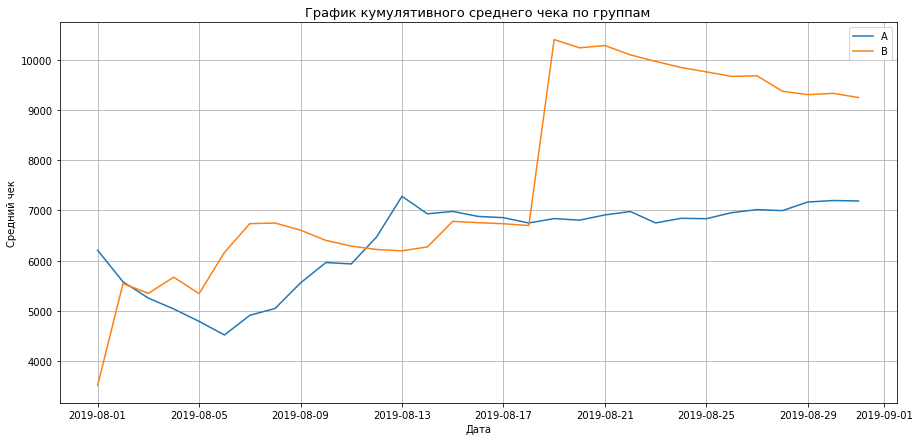

In [40]:
plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График кумулятивного среднего чека по группам", fontsize = 13)
plt.xlabel('Дата')
plt.ylabel('Средний чек')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.show()

Средний чек тоже становится равномерным ближе к концу теста: значительные колебания в начале теста, резкий всплеск 19.08.2019 у группы В, начиная с 22.08.2019 графики групп А и В как будто зеркальны относительно друг друга. Резкий скачок группы В объясняется аномально крупными заказами, что не позволяет на сделать корректные предположения о разнице в средних чеках по группам.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

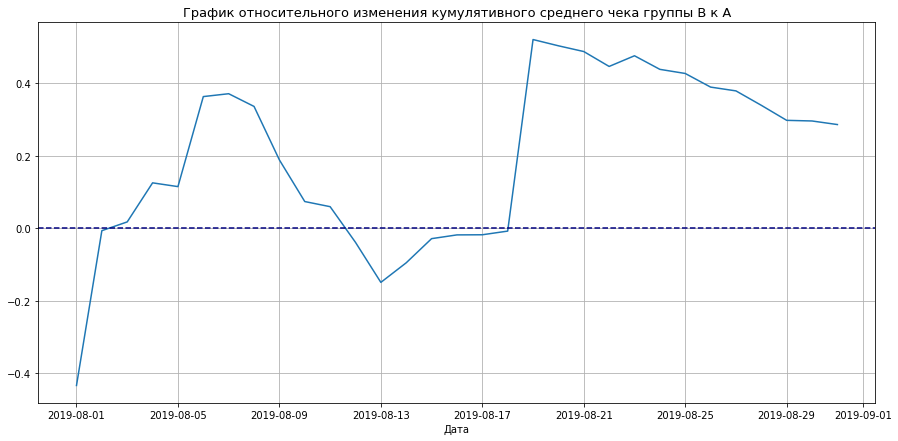

In [41]:
# формируем датафрейм с данными
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График относительного изменения кумулятивного среднего чека группы В к А", fontsize = 13)
plt.xlabel('Дата')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='navy', linestyle='--') 
plt.show()


На графике наблюдается резкие и существенные скачки в разные даты, что может объясняться аномалиями в заказах. На большинство дат кумулятивный средний чек группы В превышает показатели группы А, за исключением первого дня теста и периода 12.08.2019-15.08.2019, что коррелирует с результатами на графике кумулятивного среднего чека по группам выше (п.4.2)

#### График кумулятивной конверсии (среднего количества заказов на посетителя)

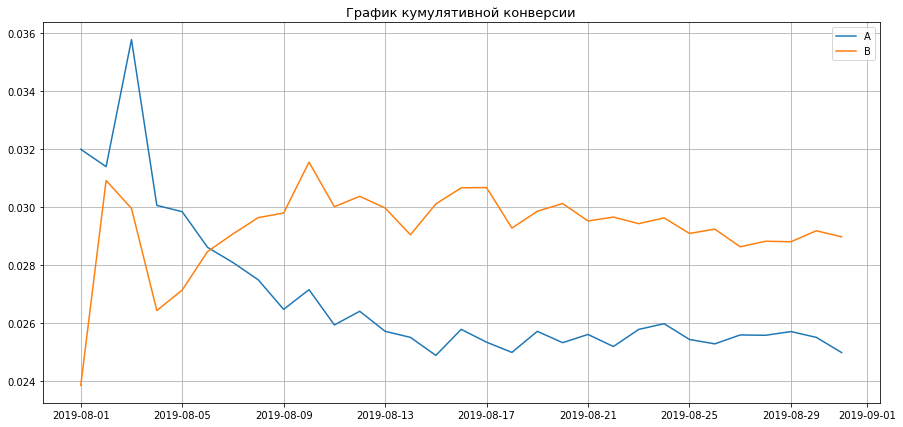

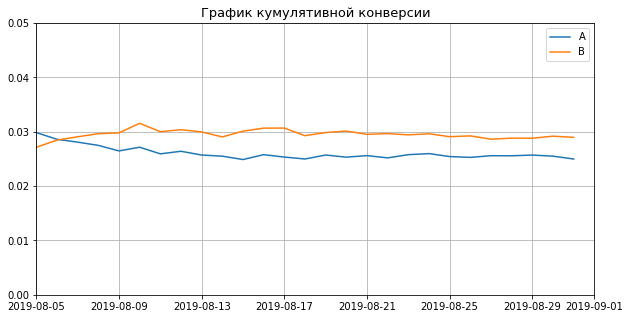

In [42]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График кумулятивной конверсии", fontsize = 13)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()


# строим графики
plt.figure(figsize=(10,5))
plt.grid()
plt.title ("График кумулятивной конверсии", fontsize = 13)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 5), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

На графике наблюдается неоднородная динамика, с превышением кумулятивной конверсии по группе А над группой В в начале августа, с 06.08.2019 показатели по группе В демонстрируют резкий рост с максимальным значением на 10.08.2019 свыше 3,1%. Далее графики обеих групп продолжают колебания, но менее резкие. Изменение масштаба графика позволяет сгладить колебания и утверждать, что конверсия установилась около своего среднего значения. 

#### График относительного изменения кумулятивной конверсии группы B к группе A

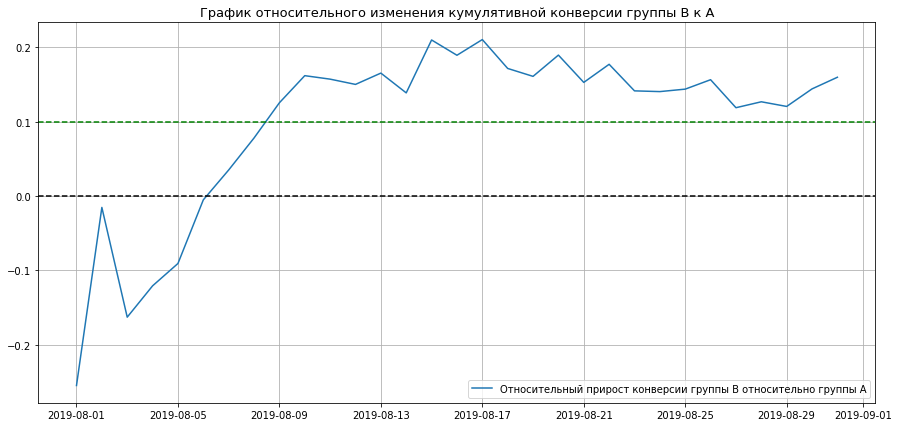

In [43]:
# построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График относительного изменения кумулятивной конверсии группы В к А", fontsize = 13)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')
plt.show()

Наблюдается преимущественное превышение конверсии группы А в начале теста с исключением на 02.08.2019. Начиная с 06.08.2019 конверсия группы В резко выросла и превышала конверсию группы А в среднем на 15%. Природу резкого всплеска проверим на этапе анализа аномалий, на данный момент фиксируем, что это предположение коррелирует с данными графиков выше. Начиная со второй недели заказы группы В относительно группы А не снижались ниже 10%.

#### График количества заказов по пользователям

In [44]:
# сформируем таблицу для данных
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userid', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


На основе полученных данных можем сделать вывод, что количество заказов, превышающее 2, выглядит аномальным, так как это больше числа заказов среднего пользователя. Но посмотрим так же распределение на точечной диаграмме.

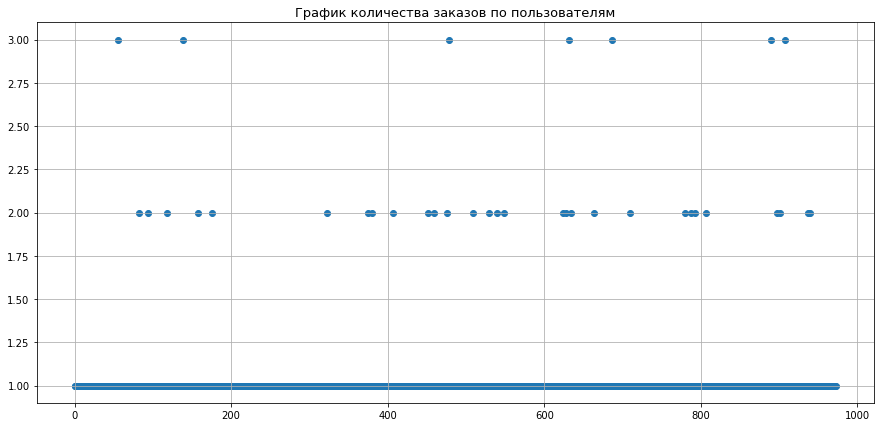

In [45]:
# построим график количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График количества заказов по пользователям", fontsize = 13)
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

По данным графика можем сделать вывод о большом количестве пользователей 1-2 заказов. Однако сделать вывод об их отнесении к "нормальному" числу или аномалиям нельзя ввиду неизвестности их доли в общем числе пользователей.

##### Перцентили количества заказов на пользователя

In [46]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более, чем 5% пользователей делали 1 заказа, не более 1% пользователей - 2 заказа. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### График стоимостей заказов

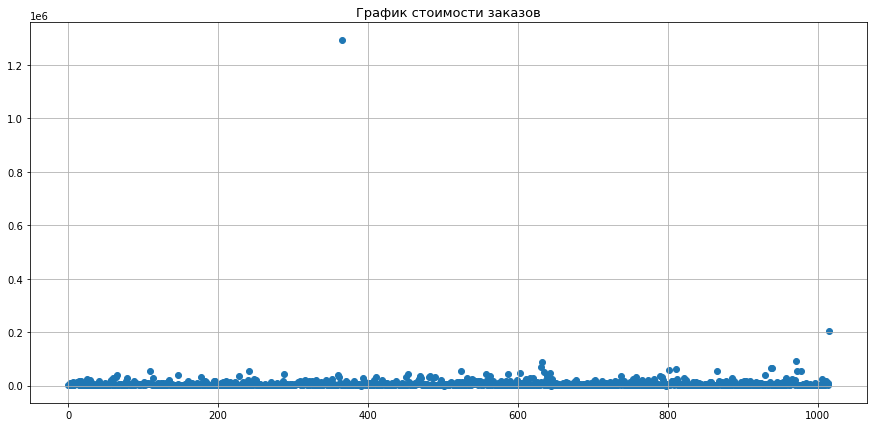

In [47]:
# построим график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График стоимости заказов", fontsize = 13)
plt.scatter(x_values, orders['revenue'])
plt.show()

На графике видны явные аномалии, ввиду с чем распределение остальных значений неочевидно. Для этого сузим интервал значений *у*.

In [48]:
display(orders.query('revenue >= 200000'))

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Данные среза таблицы orders по аномалиям объясняют всплески на графиках группы В выше, особенно в части данных на 19.08.2019.

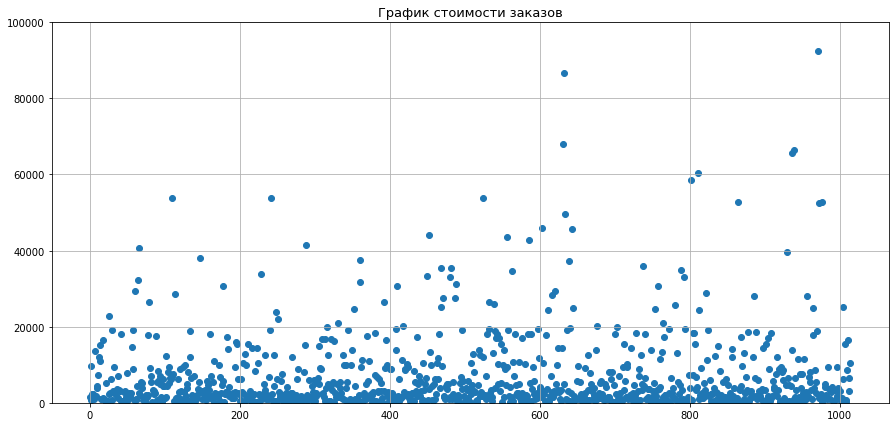

In [49]:
plt.figure(figsize=(15,7))
plt.grid()
plt.title ("График стоимости заказов", fontsize = 13)
plt.ylim([0, 100000])
plt.scatter(x_values, orders['revenue'])
plt.show()

Даже по графику среза видим, что есть отдельные редкие значения, превышающие среднюю стоимость совершенных заказов.

##### Перцентили стоимости заказов

In [50]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% заказов дороже 26785 тыс.руб., и не более 1% заказов дороже 53904 тыс.руб. В качестве аномальных значений отсеим заказы за пределами 95-го перцентиля.

#### Статистическая значимость различий между группами по "неочищенным" данным 

##### в среднем количестве заказов на посетителя

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.Сформулируем гипотезы: \
**Н0: различий в среднем количестве заказов между группами нет. \
Н1: различия в среднем между группами есть.**

Критический уровень статистической значимости = 0,05


In [51]:
# cоздадим переменные ordersByUsersA и ordersByUsersB с числом совершенных заказов для пользователей
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 


Для подготовки выборки к проверке критерием Манна-Уитни объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов, тем, кто ничего не заказал, будут соответствовать нули.

In [52]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Р-значение:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


Р-значение: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Вывод:** р-value меньше 0,05, из чего следует, что нулевую гипотезу отвергаем. По данным анализа "сырых" данных делаем вывод о наличии статистически значимых различий между группами.
Относительный прирост среднего группы В к конверсии группы А равен 16%. 

##### в среднем чеке заказа

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.Сформулируем гипотезы: \
**Н0: различий в среднем чеке между группами нет. \
Н1: различия в среднем чеке между группами есть.**

Критический уровень статистической значимости = 0,05


In [53]:
print('Р-значение:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница среднего чека:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Р-значение: 0.829
Относительная разница среднего чека: 0.287


**Вывод:** р-value 0,829 больше уровня статистической значимости 0,05, поэтому нулевую гипотезу не отвергаем, статистически значимых различий между группами нет. Однако относительная разница среднего чека 28,7% между группами при отсутствии статистически значимых различий указывает на существенное влияние выбросов.

#### Статистическая значимость различий между группами по "очищенным" данным 

##### в среднем количестве заказов на посетителя

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя между группами по «очищенным» данным — без аномалий.Сформулируем гипотезы: \
**Н0: различий в среднем количестве заказов между группами нет. \
Н1: различия в среднем между группами есть.**

Критический уровень статистической значимости = 0,05

Примем за аномальных пользователей тех, кто совершил свыше 2 заказов или совершил заказ дороже 26 785 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 5% пользователей с самыми дорогими заказами. Сделаем срезы пользователей с числом заказов — usersWithManyOrders и пользователей, совершивших дорогие заказы — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [54]:
# сделаем срез пользователей с числом заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)

# сделаем срез пользователей с суммой заказа больше 26,8 тыс.руб.
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid']

# объединим срезы в таблицы
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
58


Всего 58 аномальных пользователя.

In [55]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# применим статистический критерий Манна-Уитни к выборкам:
print('По очищенным от выбросов данным:')
print('Р-значение:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

print(' ')
print('По сырым данным:')
print('Р-значение:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


По очищенным от выбросов данным:
Р-значение: 0.012
Относительный прирост среднего числа заказов группы B: 0.182
 
По сырым данным:
Р-значение: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Вывод:** существенной разницы в p-value с результатами теста на "сырых" данных не выявлено, р-value меньше 0,05, из чего следует, что нулевую гипотезу отвергаем. По данным анализа "очищенных" данных так же делаем вывод о наличии статистически значимых различий между группами. Относительный прирост среднего числа заказов группы В к группе А равен 18,2%, что на 2,2 п.п. больше, чем прирост, рассчитанный по "сырым" данным.

##### в среднем чеке заказа

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.Сформулируем гипотезы: \
**Н0: различий в среднем чеке между группами нет. \
Н1: различия в среднем чеке между группами есть.**

Критический уровень статистической значимости = 0,05

In [56]:
print('По очищенным от выбросов данным:')
print('Р-значение:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница среднего чека:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

print(' ')
print('По сырым данным:')
print('Р-значение:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница среднего чека:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

По очищенным от выбросов данным:
Р-значение: 0.646
Относительная разница среднего чека: -0.048
 
По сырым данным:
Р-значение: 0.829
Относительная разница среднего чека: 0.287


**Вывод:** р-value снизился и составил 0,646, нулевую гипотезу не отвергаем, статистических различий по среднему чеку между группами нет. \
Если по "сырым" данным относительная разница среднего чека группы В на 28,7% превышал средний чек группы А, то по очищенным данным наблюдается незначительное (на 4,8%) превышение среднего чека группы А над средним чеком группы B, что объясняется аномально дорогой продажей 19.08.2019 пользователю из группы В.

#### Выводы по разделу

**Выводы по результату теста:**

•	Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по очищенным от аномалий данным;\
•	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по очищенным данным;\
•	График относительного изменения кумулятивного среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и составляют 18,2% по данным без аномальных значений;\
•	По графику различия среднего чека сделали вывод о наличии существенных аномалий;\
•	По данным графика среднего количества заказов на пользователя между группами сделали вывод о том, что данный показатель группы B превышает показатели группы А.
 
**Решение по результатам теста:**\
Исходя из полученных результатов представляется целесообразным остановить тест, зафиксировать победу группы В ввиду лучшего показателя среднего количества заказов на пользователя по группе В при отсутствии значимых различий по среднему чеку.

### Выводы по проекту

*5.1 Предобработка данных* \
Пропуски в данных, явные и неявные дубликаты отсутствуют. Названия столбцов приведены к нижнему "змеиному" регистру. Формат столбцов с датой приведен к типу "datetime".

*5.2 Приоритизация гипотез* \
Приоритизировали гипотезы с применением фреймворков ICE и RICE, получили следующие результаты:\
в случае с ICE приоритетной могла считаться гипотеза о скидке в день рождения, \
в случае с RICE гипотеза о форме для сбора базы e-mail является наиболее приоритетной, так как она имеет наивысшую оценку охвата пользователей Reach (10).

Применяя оба фреймворка пришли к результату о непопулярности гипотезы об изменении цвета фона страницы: при невысокой стоимости тестирования этой гипотезы она также имеет низкую оценку охвата и влияния и уверенности в этом влиянии.\
В случае и с ICE, и с RICE топ-5 гипотез одинаковы, меняется только их порядок: например, с учетом количества пользовательского охвата на 2-м месте по приоритетности будет гипотеза о добавлении рекомендаций товаров на сайте для повышения конверсии и среднего чека заказа (охват-8,уверенность-7,относительно небольшие трудозатраты-3) и на 3-м - новые каналы привлечения трафика, привлекающие на 30% больше пользователей (максимальная оценка влияния-10, высокая уверенность в присвоенных оценках-8).

*5.3 Анализ А/В-теста* \
5.3.1 Мы построили следующие графики: 
- график кумулятивной выручки по группам 
    - выручка имеет тенденцию к росту;    
- кумулятивного среднего чека по группам
    - средний чек становится равномерным ближе к конце теста, наблюдается аномальный всплеск у группы В;  
- относительного изменения кумулятивного среднего чека группы B к группе A
    - график подтверждает наши предположения о наличии выбросов;
- кумулятивного среднего количества заказов на посетителя по группам
    - после колебаний показатель по группе В установился на значении больше,чем показатель группы А и не снижался ниже 10%;
- относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
    - в начале теста группа B проигрывала группе A, затем вырвалась вперёд, на графике продолжает наблюдаться волатильность при сохранении группой В лидерства;
- точечный график количества заказов по пользователям
    - на графике преобладают пользователи с 1-2 заказами
- точечный график стоимостей заказов
    - на графике выявили существенные выбросы: два заказа стоимостью свыше 200 тыс.руб.
    
5.3.2. Мы посчитали:
- 95-й и 99-й перцентили количества заказов на пользователя
    - не более, чем 5% пользователей делали 1 заказа, не более 1% пользователей - 2 заказа; установили верхнюю границу на 2 заказах, по которой отсеем аномалии.
- 95-й и 99-й перцентили стоимости заказов
    - не более 5% заказов дороже 26,8 тыс.руб., и не более 1% заказов дороже 53,9 тыс.руб., в качестве аномальных значений отсеяли заказы стоимостью выше 95-го перцентиля.
- статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным
    - р-value = 0,011, меньше 0,05, из чего следует, что нулевую гипотезу отвергаем. 
- статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
    - р-value = 0,829, больше уровня статистической значимости 0,05, поэтому нулевую гипотезу не отвергаем, статистически значимых различий между группами нет.
- статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. 
    - р-value = 0,012, меньше 0,05, из чего следует, что нулевую гипотезу отвергаем, есть различия.
- статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
    - р-value = 0,646, больше уровня статистической значимости 0,05, поэтому нулевую гипотезу не отвергаем, статистически значимых различий между группами нет.


1. По данным анализа "сырых" данных делаем вывод о наличии статистически значимых различий в среднем количестве заказов между группами. Относительный прирост среднего числа заказов на пользователя группы В к группе А равен 16%. 
2. По данным анализа "сырых" данных делаем вывод об отсутствии статистически значимых различий в среднем чеке заказа между группами. Относительная разница среднего чека: 28,7%, что при отсутствии статистической значимости указывает на выбросы.
3. По данным анализа "очищенных" данных делаем вывод о наличии статистически значимых различий в среднем количестве заказов между группами. Относительный прирост среднего числа заказов на пользователя группы В к группе А равен 18,2%, что 2,2 п.п. больше, чем прирост по "сырым" данным.
4. По данным анализа "очищенных" данных делаем вывод об отсутствии статистических различий по среднему чеку между группами.
Если по "сырым" данным относительная разница среднего чека группы В на 28,7% превышал средний чек группы А, то по очищенным данным наблюдается незначительное (на 4,8%) превышение среднего чека группы А над средним чеком группы B, что объясняется аномально дорогой продажей 19.08.2019 пользователю из группы В.

По результатам теста представляется целесообразным остановить тест, зафиксировать победу группы В ввиду лучшего показателя среднего числа заказов на пользователя по группе В при отсутствии значимых различий по среднему чеку.